## Lasso Regression
Lasso Regression (Least Absolute Shrinkage and Selection Operator) is a powerful statistical method that performs both regularization (reducing model complexity to prevent overfitting) and variable selection, especially useful for high-dimensional data, by adding a penalty term (L1 norm) to the standard linear regression cost function, which can shrink some coefficients to exactly zero, effectively removing those features. This leads to simpler, more interpretable models by identifying and discarding irrelevant predictors, unlike Ridge Regression which shrinks coefficients but rarely to zero.

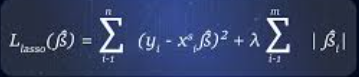
## Key Advantages
## Prevents Overfitting:
Reduces model complexity, improving generalization to new data.
## Automatic Feature Selection:
Identifies and eliminates irrelevant features, simplifying models.
## Handles High-Dimensional Data: 
Excellent for datasets with many features (predictors).
## Interpretability: 
Sparse models with fewer non-zero coefficients are easier to understand. 
## Lasso (L1): 
Uses absolute value penalty; can set coefficients to zero (feature selection).
## Ridge (L2): 
Uses squared penalty; shrinks coefficients towards zero but rarely to zero (no feature selection). 

In [1]:
import numpy as np
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

X = np.array([
    [2100, 3, 2, 15, 1],
    [1600, 2, 1, 20, 0],
    [2400, 4, 3, 10, 1],
    [1400, 2, 1, 25, 0],
    [3000, 5, 4, 8, 1],
    [1700, 3, 2, 18, 0],
    [2200, 4, 3, 12, 1]
])

y = np.array([500, 330, 600, 300, 750, 400, 580])


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

lasso = Lasso(alpha=0.5)  


lasso.fit(X_train, y_train)

y_pred = lasso.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


print("Predictions:", y_pred)
print("Mean Squared Error:", mse)
print("R^2 Score:", r2)
print("Coefficients:", lasso.coef_)
print("Intercept:", lasso.intercept_)


Predictions: [484.77836436 341.37773759 427.8767495 ]
Mean Squared Error: 379.42142234023714
R^2 Score: 0.9220366940396773
Coefficients: [ 1.16207796e-01  6.79325681e+01  6.90909318e-14 -3.47283210e+00
  0.00000000e+00]
Intercept: 89.03676918827807


##  What is LassoCV?
LassoCV is an extension of Lasso Regression in scikit-learn that automatically finds the best regularization parameter (𝛼) using cross-validation.
## Normal Lasso:
You must manually choose 𝛼
## LassoCV:
It tests multiple alpha values and picks the one that gives the best performance on validation data.

In [2]:
import numpy as np
from sklearn.linear_model import LassoCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

X = np.array([
    [2100, 3, 2, 15, 1],
    [1600, 2, 1, 20, 0],
    [2400, 4, 3, 10, 1],
    [1400, 2, 1, 25, 0],
    [3000, 5, 4, 8, 1],
    [1700, 3, 2, 18, 0],
    [2200, 4, 3, 12, 1]
])
y = np.array([500, 330, 600, 300, 750, 400, 580])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
lasso_cv = LassoCV(cv=2, alphas=[0.01, 0.1, 0.5, 1.0, 10.0])
lasso_cv.fit(X_train, y_train)
y_pred = lasso_cv.predict(X_test)

print("Best Alpha:", lasso_cv.alpha_)
print("Predictions:", y_pred)
print("Coefficients:", lasso_cv.coef_)
print("Intercept:", lasso_cv.intercept_)
print("R^2 Score:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))


Best Alpha: 10.0
Predictions: [517.84604334 380.28808073 414.25340176]
Coefficients: [ 0.21057864  0.          0.         -6.45372851  0.        ]
Intercept: 172.4368266991624
R^2 Score: 0.7910594665773341
MSE: 1016.8439293236406
